In [2]:
#逻辑回归通常被用于处理二分类问题，但逻辑回归也可以做多分类
from sklearn.linear_model import LogisticRegression as LR
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [9]:
data = load_breast_cancer()
X = data.data
print(X.shape)
y = data.target

#这里一共有30个特征，但是要看有没有乳腺癌，30个特征太多了，要特征选择

(569, 30)


In [12]:
#实例化两个逻辑回归的模型，一个是L1正则，一个是L2正则
lrl1 = LR(penalty="l1",solver="liblinear",C=0.5,max_iter=1000)
lrl2 = LR(penalty="l2",solver="liblinear",C=0.5,max_iter=1000)

In [13]:
lrl1 = lrl1.fit(X,y)
#逻辑回归的重要属性coef_就是θ，查看每个特征所对应的参数
lrl1.coef_#虽然有30个参数，但是很多参数都返回了0

array([[ 3.9811889 ,  0.03127831, -0.13433021, -0.01619932,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.50242609,  0.        , -0.07123931,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -0.24509139, -0.1283685 , -0.01443098,  0.        ,
         0.        , -2.06137535,  0.        ,  0.        ,  0.        ]])

In [20]:
lrl1.coef_ != 0 #把lrl1.coef数组里不等于0的取出来

array([[ True,  True,  True,  True, False, False, False, False, False,
        False, False,  True, False,  True, False, False, False, False,
        False, False, False,  True,  True,  True, False, False,  True,
        False, False, False]], dtype=bool)

In [18]:
(lrl1.coef_ != 0).sum(axis=1)

array([10])

In [22]:
lrl2 = lrl2.fit(X,y)
lrl2.coef_
#有很多很小的参数，但是没有0

array([[  1.61543234e+00,   1.02284415e-01,   4.78483684e-02,
         -4.43927107e-03,  -9.42247882e-02,  -3.01420673e-01,
         -4.56065677e-01,  -2.22346063e-01,  -1.35660484e-01,
         -1.93917198e-02,   1.61646580e-02,   8.84531037e-01,
          1.20301273e-01,  -9.47422278e-02,  -9.81687769e-03,
         -2.37399092e-02,  -5.71846204e-02,  -2.70190106e-02,
         -2.77563737e-02,   1.98122260e-04,   1.26394730e+00,
         -3.01762592e-01,  -1.72784162e-01,  -2.21786411e-02,
         -1.73339657e-01,  -8.79070550e-01,  -1.16325561e+00,
         -4.27661014e-01,  -4.20612369e-01,  -8.69820058e-02]])

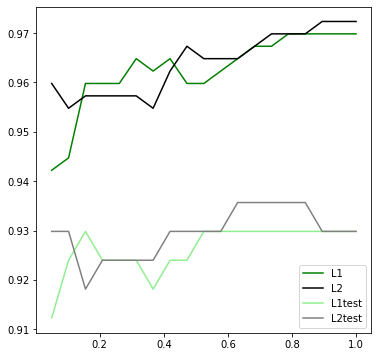

In [28]:
#画C的学习曲线
l1 = []
l2 = []
l1test = []
l2test = []
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=420)

for i in np.linspace(0.05,1,19):
    lrl1 = LR(penalty="l1",solver="liblinear",C=i,max_iter=1000)
    lrl2 = LR(penalty="l2",solver="liblinear",C=i,max_iter=1000)
    lrl1 = lrl1.fit(X_train,y_train)
    l1.append(accuracy_score(y_train,lrl1.predict(X_train)))
    l1test.append(accuracy_score(y_test,lrl1.predict(X_test)))#就等于lrl1.score(Xtest,ytest)
    
    lrl2 = lrl2.fit(X_train,y_train)
    l2.append(accuracy_score(y_train,lrl2.predict(X_train)))
    l2test.append(accuracy_score(y_test,lrl2.predict(X_test)))
    
graph = [l1,l2,l1test,l2test]
color = ["green","black","lightgreen","gray"]
label = ["L1","L2","L1test","L2test"]
    
#循环画图    
plt.figure(figsize=(6,6))
for i in range(len(graph)):
    plt.plot(np.linspace(0.05,1,19),graph[i],color[i],label=label[i])
plt.legend(loc=4)
plt.show()
    